In [92]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
from sklearn.cluster import KMeans

In [93]:
os.chdir('D:/Penn/Career/Citadel/2021datathon')
df = pd.read_csv('team_attributes.csv')

In [94]:
id_fts = [
    'team_id', # will be dropped during clustering
    'date' # will be dropped during clustering
]

cat_fts = [
    'buildUpPlayPositioningClass',
    'chanceCreationPositioningClass',
    'defenceDefenderLineClass'
]

features = id_fts + [
    'buildUpPlaySpeed',
    'buildUpPlayDribbling',
    'buildUpPlayPassing',
    'chanceCreationPassing',
    'chanceCreationCrossing',
    'chanceCreationShooting',
    'defencePressure',
    'defenceAggression',
    'defenceTeamWidth'
] + cat_fts

df_1 = pd.get_dummies(data = df[features], columns = cat_fts)
df_1.columns.values

array(['team_id', 'date', 'buildUpPlaySpeed', 'buildUpPlayDribbling',
       'buildUpPlayPassing', 'chanceCreationPassing',
       'chanceCreationCrossing', 'chanceCreationShooting',
       'defencePressure', 'defenceAggression', 'defenceTeamWidth',
       'buildUpPlayPositioningClass_Free Form',
       'buildUpPlayPositioningClass_Organised',
       'chanceCreationPositioningClass_Free Form',
       'chanceCreationPositioningClass_Organised',
       'defenceDefenderLineClass_Cover',
       'defenceDefenderLineClass_Offside Trap'], dtype=object)

In [95]:
# fill nan in buildUpPlayDribbling with team mean
dribbling = df_1.groupby(['team_id'])['buildUpPlayDribbling'].mean().fillna(0)
df_1 = df_1.drop('buildUpPlayDribbling', axis = 1)

df_1 = df_1.join(dribbling, on = 'team_id').drop_duplicates(subset = [
    'buildUpPlaySpeed', 'buildUpPlayDribbling',
    'buildUpPlayPassing', 'chanceCreationPassing',
    'chanceCreationCrossing', 'chanceCreationShooting',
    'defencePressure', 'defenceAggression', 'defenceTeamWidth',
    'buildUpPlayPositioningClass_Free Form',
    'buildUpPlayPositioningClass_Organised',
    'chanceCreationPositioningClass_Free Form',
    'chanceCreationPositioningClass_Organised',
    'defenceDefenderLineClass_Cover',
    'defenceDefenderLineClass_Offside Trap'])
df_2 = df_1.drop(['team_id', 'date'], axis = 1)

In [96]:
print(len(df_2))

1316


In [97]:
Nc = range(1, 51)
kmeans = [KMeans(n_clusters = n) for n in Nc]
score = np.array([kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))])

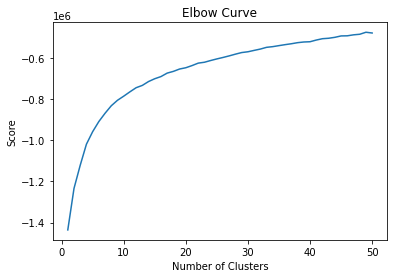

In [98]:
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# from the graph, we need 10 clusters to describe team attributes.
# TODO verify this result with other methods

In [99]:
kmeans = KMeans(n_clusters = 10)
df_1['cluster'] = kmeans.fit_predict(df_2)
df_1['cluster'].value_counts(dropna = False)

7    193
4    188
3    186
8    182
0    147
6    143
1    109
2     69
9     51
5     48
Name: cluster, dtype: int64

In [100]:
df_1.to_csv("team_att_w_cluster.csv")